In [1]:
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 200

# diasbling warning messages
import warnings
warnings.filterwarnings("ignore")

# importing key libraries
import pandas as pd
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

# numpy import
import numpy as np

# scipy import
import scipy.stats as stats

import datetime

# importing wrangle/acquire module
import wrangle
from wrangle import get_zillow_dataset, \
                    null_df, \
                    drop_nulls, \
                    clean_zillow_dataset, \
                    train_validate_test_split

# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

# sklearn data science library
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
# data acquisition and preparation

df = get_zillow_dataset()
print(df.shape)

(52319, 68)


In [3]:
# initial clean of dataset 
# where: feature and record null % > 80% are dropped

df = clean_zillow_dataset(df)
df.head()

dataframe shape: (52238, 16)


,bathroom_count,bedroom_count,living_sq_feet,county_by_fips,land_assessed_value,latitude,logerror,longitude,property_sq_feet,county_zoning_code,blockgroup_assignment,home_assessed_value,taxamount,home_value,transaction_date,year_built
0,3.50,4.00,3100.00,Orange County,537569.00,33634931.00,0.03,-117869207.00,4506.00,122,60590630.07,485713.00,11013.72,1023282.00,2017-01-01,1998.00
1,1.00,2.00,1465.00,Ventura County,376000.00,34449266.00,0.06,-119281531.00,12647.00,1110,61110010.02,88000.00,5672.48,464000.00,2017-01-01,1967.00
2,2.00,3.00,1243.00,Orange County,479489.00,33886168.00,0.01,-117823170.00,8432.00,122,60590218.02,85289.00,6488.30,564778.00,2017-01-01,1962.00
3,3.00,4.00,2376.00,LA County,36225.00,34245180.00,-0.10,-118240722.00,13038.00,0101,60373001.00,108918.00,1777.51,145143.00,2017-01-01,1970.00
4,3.00,4.00,2962.00,LA County,496619.00,34145202.00,-0.00,-118179824.00,63000.00,0101,60374608.00,276684.00,9516.26,773303.00,2017-01-01,1950.00


In [4]:
# calculating and adding age of the home thru 2017

df = wrangle.age_of_homes(df)
df.head()

,bathroom_count,bedroom_count,living_sq_feet,county_by_fips,land_assessed_value,latitude,logerror,longitude,property_sq_feet,county_zoning_code,blockgroup_assignment,home_assessed_value,taxamount,home_value,transaction_date,year_built,home_age
0,3.50,4.00,3100.00,Orange County,537569.00,33634931.00,0.03,-117869207.00,4506.00,122,60590630.07,485713.00,11013.72,1023282.00,2017-01-01,1998.00,19.00
1,1.00,2.00,1465.00,Ventura County,376000.00,34449266.00,0.06,-119281531.00,12647.00,1110,61110010.02,88000.00,5672.48,464000.00,2017-01-01,1967.00,50.00
2,2.00,3.00,1243.00,Orange County,479489.00,33886168.00,0.01,-117823170.00,8432.00,122,60590218.02,85289.00,6488.30,564778.00,2017-01-01,1962.00,55.00
3,3.00,4.00,2376.00,LA County,36225.00,34245180.00,-0.10,-118240722.00,13038.00,0101,60373001.00,108918.00,1777.51,145143.00,2017-01-01,1970.00,47.00
4,3.00,4.00,2962.00,LA County,496619.00,34145202.00,-0.00,-118179824.00,63000.00,0101,60374608.00,276684.00,9516.26,773303.00,2017-01-01,1950.00,67.00


In [5]:
# adding transactions by month columns

df = wrangle.clean_months(df)
df.head()

,bathroom_count,bedroom_count,living_sq_feet,county_by_fips,land_assessed_value,latitude,logerror,longitude,property_sq_feet,county_zoning_code,blockgroup_assignment,home_assessed_value,taxamount,home_value,year_built,home_age,transaction_month
0,3.50,4.00,3100.00,Orange County,537569.00,33634931.00,0.03,-117869207.00,4506.00,122,60590630.07,485713.00,11013.72,1023282.00,1998.00,19.00,January
1,1.00,2.00,1465.00,Ventura County,376000.00,34449266.00,0.06,-119281531.00,12647.00,1110,61110010.02,88000.00,5672.48,464000.00,1967.00,50.00,January
2,2.00,3.00,1243.00,Orange County,479489.00,33886168.00,0.01,-117823170.00,8432.00,122,60590218.02,85289.00,6488.30,564778.00,1962.00,55.00,January
3,3.00,4.00,2376.00,LA County,36225.00,34245180.00,-0.10,-118240722.00,13038.00,0101,60373001.00,108918.00,1777.51,145143.00,1970.00,47.00,January
4,3.00,4.00,2962.00,LA County,496619.00,34145202.00,-0.00,-118179824.00,63000.00,0101,60374608.00,276684.00,9516.26,773303.00,1950.00,67.00,January


In [6]:
# df['example1'] = pd.to_datetime(df.transaction_date).dt.to_period('m')
# df['example1'].head()

In [7]:
# df['example2'] = pd.to_datetime(df.transaction_date).dt.strftime('%m/%Y')
# df.example2.head()

In [8]:
# dataframe info

sorted_cols = df.columns.sort_values()
df[sorted_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52238 entries, 0 to 52318
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bathroom_count         52238 non-null  float64
 1   bedroom_count          52238 non-null  float64
 2   blockgroup_assignment  52238 non-null  float64
 3   county_by_fips         52238 non-null  object 
 4   county_zoning_code     52238 non-null  object 
 5   home_age               52200 non-null  float64
 6   home_assessed_value    52166 non-null  float64
 7   home_value             52237 non-null  float64
 8   land_assessed_value    52237 non-null  float64
 9   latitude               52238 non-null  float64
 10  living_sq_feet         52238 non-null  float64
 11  logerror               52238 non-null  float64
 12  longitude              52238 non-null  float64
 13  property_sq_feet       51881 non-null  float64
 14  taxamount              52234 non-null  float64
 15  tr

In [9]:
# checking initial dataset nulls and percentage of dataframe features

remaining_nulls = null_df(df)
remaining_nulls

,Total Null,Feature Null %
property_sq_feet,357,0.01
home_assessed_value,72,0.00
home_age,38,0.00
year_built,38,0.00
taxamount,4,0.00
land_assessed_value,1,0.00
home_value,1,0.00
county_zoning_code,0,0.00
blockgroup_assignment,0,0.00
bathroom_count,0,0.00


In [10]:
# summing total number of outliers per continuous feature - target variable

wrangle.sum_outliers(df)

,Feature,Upper_Bound,Total Outliers
0,property_sq_feet,13591.00,5528
1,blockgroup_assignment,60915040.10,4372
2,home_assessed_value,449560.25,3882
3,taxamount,14441.20,3782
4,home_value,1256382.50,3507
5,land_assessed_value,906302.00,2996
6,living_sq_feet,3863.00,2272
7,bathroom_count,4.50,1577
8,bedroom_count,5.50,777
9,home_age,110.50,240


In [11]:
# identifying continuous variables/features:

num_lst = df.select_dtypes("number").columns.tolist()
num_lst = [ele for ele in num_lst if ele not in ("logerror", "year_built")]
num_lst

['bathroom_count',
 'bedroom_count',
 'living_sq_feet',
 'land_assessed_value',
 'latitude',
 'longitude',
 'property_sq_feet',
 'blockgroup_assignment',
 'home_assessed_value',
 'taxamount',
 'home_value',
 'home_age']

In [12]:
# check the df shape before handling outliers

df.shape

(52238, 17)

In [13]:
# let's handle the outliers using a upper bound "capping" method

df = wrangle.capp_outliers(df, num_lst)
df.head()

,bathroom_count-capped,bedroom_count-capped,living_sq_feet-capped,county_by_fips,land_assessed_value-capped,latitude-capped,logerror,longitude-capped,property_sq_feet-capped,county_zoning_code,blockgroup_assignment-capped,home_assessed_value-capped,taxamount-capped,home_value-capped,year_built,home_age-capped,transaction_month
0,3.50,4.00,3100.00,Orange County,537569.00,33634931.00,0.03,-117869207.00,4506.00,122,60590630.07,449560.25,11013.72,1023282.00,1998.00,19.00,January
1,1.00,2.00,1465.00,Ventura County,376000.00,34449266.00,0.06,-119281531.00,12647.00,1110,60915040.10,88000.00,5672.48,464000.00,1967.00,50.00,January
2,2.00,3.00,1243.00,Orange County,479489.00,33886168.00,0.01,-117823170.00,8432.00,122,60590218.02,85289.00,6488.30,564778.00,1962.00,55.00,January
3,3.00,4.00,2376.00,LA County,36225.00,34245180.00,-0.10,-118240722.00,13038.00,0101,60373001.00,108918.00,1777.51,145143.00,1970.00,47.00,January
4,3.00,4.00,2962.00,LA County,496619.00,34145202.00,-0.00,-118179824.00,13591.00,0101,60374608.00,276684.00,9516.26,773303.00,1950.00,67.00,January


In [14]:
# checking the dataframe shape after capping outliers

df.shape

(52238, 17)

----
### **``splitting zillow dataset and cleaning remaining nulls/missing values:``**

In [15]:
# splitting the dataset to 1. fill-in remaining nulls and 2. determine outlier cutoffs

train, validate, test = train_validate_test_split(df)

train shape: (29253, 17)
validate shape: (12537, 17)
test shape: (10448, 17)


In [16]:
# creating a new continuous feature list in datasets

num_lst = train.select_dtypes("number").columns.tolist()
num_lst = [ele for ele in num_lst if ele not in ("logerror")]
num_lst

['bathroom_count-capped',
 'bedroom_count-capped',
 'living_sq_feet-capped',
 'land_assessed_value-capped',
 'latitude-capped',
 'longitude-capped',
 'property_sq_feet-capped',
 'blockgroup_assignment-capped',
 'home_assessed_value-capped',
 'taxamount-capped',
 'home_value-capped',
 'year_built',
 'home_age-capped']

In [17]:
# checking train dataset for remaining nulls

null_df = null_df(train)
null_df

,Total Null,Feature Null %
property_sq_feet-capped,208,0.01
home_assessed_value-capped,40,0.00
home_age-capped,21,0.00
year_built,21,0.00
taxamount-capped,3,0.00
land_assessed_value-capped,1,0.00
home_value-capped,1,0.00
county_zoning_code,0,0.00
blockgroup_assignment-capped,0,0.00
bathroom_count-capped,0,0.00


In [18]:
# checking dataframe after split

train.head()

,bathroom_count-capped,bedroom_count-capped,living_sq_feet-capped,county_by_fips,land_assessed_value-capped,latitude-capped,logerror,longitude-capped,property_sq_feet-capped,county_zoning_code,blockgroup_assignment-capped,home_assessed_value-capped,taxamount-capped,home_value-capped,year_built,home_age-capped,transaction_month
7961,3.00,3.00,1903.00,LA County,715657.00,34204513.00,0.15,-118131241.00,10704.00,0100,60374602.00,196647.00,10691.12,912304.00,1957.00,60.00,February
47936,3.00,4.00,2108.00,LA County,862962.00,34147955.00,0.01,-118350425.00,8432.00,0100,60371431.00,449560.25,14441.20,1256382.50,1935.00,82.00,August
20730,4.00,4.00,2446.00,LA County,432406.00,34135818.00,-0.04,-118407312.00,9568.00,0100,60371439.01,418119.00,10333.34,850525.00,1962.00,55.00,April
1988,1.00,3.00,1120.00,LA County,408600.00,33893976.00,-0.05,-118334891.00,5250.00,0101,60376037.02,101400.00,6387.31,510000.00,1953.00,64.00,January
45959,2.00,3.00,1918.00,LA County,193425.00,33910440.00,0.03,-118013069.00,7936.00,0100,60375040.01,149747.00,4519.94,343172.00,1958.00,59.00,August


In [19]:
# using sklearn's iterative imputer to fill-in remaining nulls

def train_iterative_imputer(train_df):

        # placeholder for continuous features
        num_lst = [
        'bathroom_count-capped',
        'bedroom_count-capped',
        'living_sq_feet-capped',
        'land_assessed_value-capped',
        'latitude-capped',
        'longitude-capped',
        'property_sq_feet-capped',
        'blockgroup_assignment-capped',
        'home_assessed_value-capped',
        'taxamount-capped',
        'home_value-capped',
        'year_built',
        'home_age-capped']

        # creating the "thing"
        imputer = IterativeImputer(
                missing_values = np.nan, \
                skip_complete = True, \
                random_state = 123)
        
        # fitting the "thing" and transforming it
        imputed = imputer.fit_transform(train_df[num_lst])

           # create a new dataframe with learned imputed data
        train_df_imputed = pd.DataFrame(imputed, index = train_df.index)

        # filling in missing values from learned imputer
        train_df[num_lst] = train_df_imputed

        # return the new imputed df
        return train_df

In [20]:
# let's fit the imputer and return it

train_imputed = train_iterative_imputer(train)
train_imputed.isnull().sum()

bathroom_count-capped           0
bedroom_count-capped            0
living_sq_feet-capped           0
county_by_fips                  0
land_assessed_value-capped      0
latitude-capped                 0
logerror                        0
longitude-capped                0
property_sq_feet-capped         0
county_zoning_code              0
blockgroup_assignment-capped    0
home_assessed_value-capped      0
taxamount-capped                0
home_value-capped               0
year_built                      0
home_age-capped                 0
transaction_month               0
dtype: int64

In [21]:
# let's transform validate and test datasets

num_lst = [
        'bathroom_count-capped',
        'bedroom_count-capped',
        'living_sq_feet-capped',
        'land_assessed_value-capped',
        'latitude-capped',
        'longitude-capped',
        'property_sq_feet-capped',
        'blockgroup_assignment-capped',
        'home_assessed_value-capped',
        'taxamount-capped',
        'home_value-capped',
        'year_built',
        'home_age-capped']

# creating the "thing"
imputer = IterativeImputer(
        missing_values = np.nan, \
        skip_complete = True, \
        random_state = 123)

# fitting the "thing" and transforming it
imputed = imputer.fit(train[num_lst])

val_imputed = imputed.transform(validate[num_lst])
X_validate_imputed = pd.DataFrame(val_imputed, index = validate.index)
validate[num_lst] = X_validate_imputed
validate_imputed = validate

test_imputed = imputed.transform(test[num_lst])
test_imputed = pd.DataFrame(test_imputed, index = test.index)
test[num_lst] = test_imputed
test_imputed = test

# checking the dataset for nulls
print('null results in: validate')
print('----------------------------|---------')
print(f'{validate_imputed.isnull().sum()}')
print()
print('null results in: test')
print('----------------------------|---------')
print(f'{test_imputed.isnull().sum()}')

null results in: validate
----------------------------|---------
bathroom_count-capped           0
bedroom_count-capped            0
living_sq_feet-capped           0
county_by_fips                  0
land_assessed_value-capped      0
latitude-capped                 0
logerror                        0
longitude-capped                0
property_sq_feet-capped         0
county_zoning_code              0
blockgroup_assignment-capped    0
home_assessed_value-capped      0
taxamount-capped                0
home_value-capped               0
year_built                      0
home_age-capped                 0
transaction_month               0
dtype: int64

null results in: test
----------------------------|---------
bathroom_count-capped           0
bedroom_count-capped            0
living_sq_feet-capped           0
county_by_fips                  0
land_assessed_value-capped      0
latitude-capped                 0
logerror                        0
longitude-capped                0
property_s

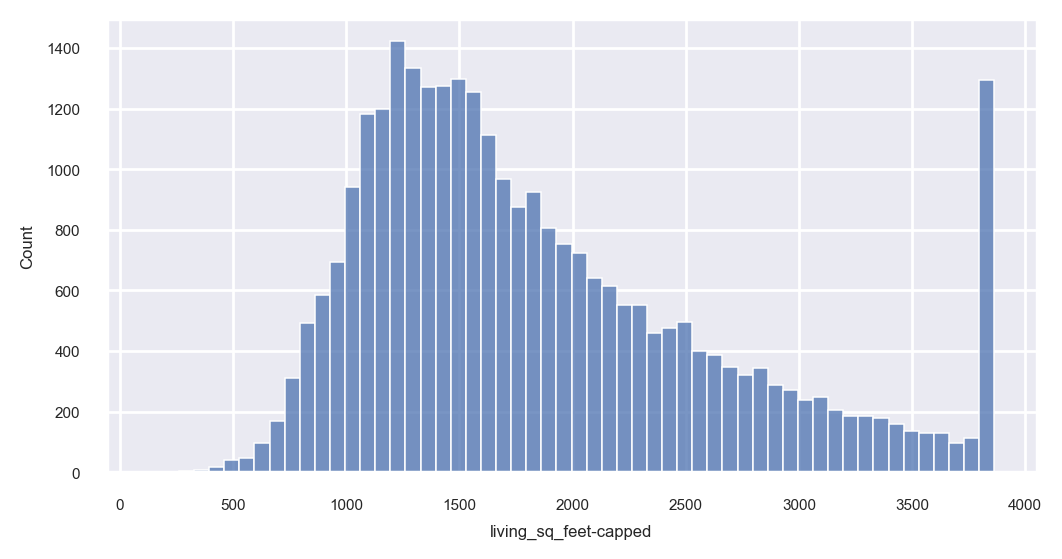

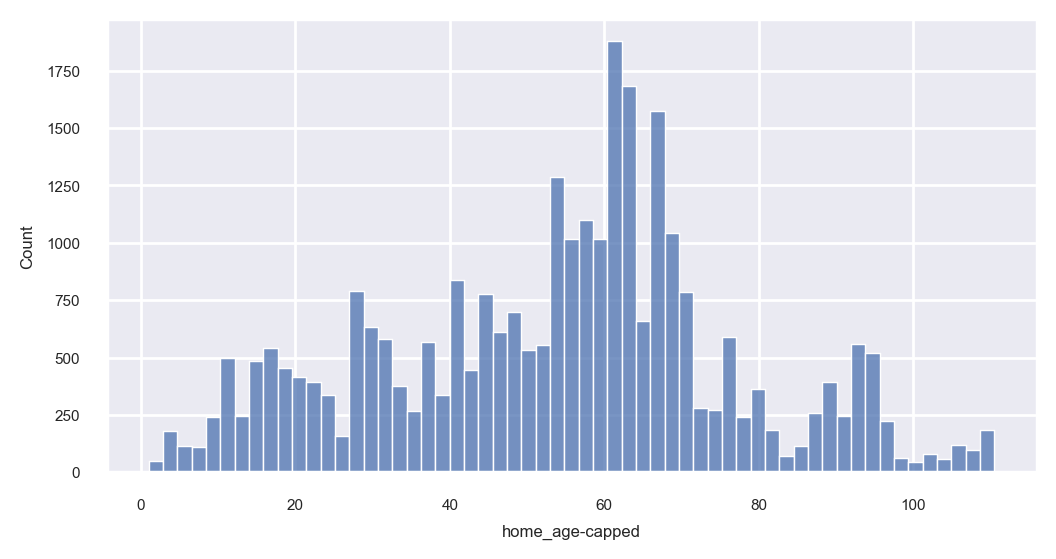

In [22]:
# let's bin the following features:

# living sq. feet = relative size of the home (<1K, 1-2K, 2-3K, 4K, etc.)
# home age = relative age of the home (e.g., recent build, mid-century, early-century, last-century, etc.)

for col in train_imputed[["living_sq_feet-capped", "home_age-capped"]]:
    plt.figure(figsize = (6, 3))
    sns.set(font_scale = .5)
    
    sns.histplot(train_imputed[col])
    plt.show()


In [23]:
# pandas cut method on Home Age
# [(0.999, 38.0] < (38.0, 57.0] < (57.0, 67.0] < (67.0, 110.5]]

age_labels = ["new century", "mid 20th-century", "early 20th-century", "late 19th-century"]

train_imputed["home_age-binned"] = pd.qcut(
    train_imputed["home_age-capped"], \
    q = 4, \
    labels = age_labels)

validate_imputed["home_age-binned"] = pd.qcut(
    validate_imputed["home_age-capped"], \
    q = 4, \
    labels = age_labels)

test_imputed["home_age-binned"] = pd.qcut(
    test_imputed["home_age-capped"], \
    q = 4, \
    labels = age_labels)

train_imputed.head()

,bathroom_count-capped,bedroom_count-capped,living_sq_feet-capped,county_by_fips,land_assessed_value-capped,latitude-capped,logerror,longitude-capped,property_sq_feet-capped,county_zoning_code,blockgroup_assignment-capped,home_assessed_value-capped,taxamount-capped,home_value-capped,year_built,home_age-capped,transaction_month,home_age-binned
7961,3.00,3.00,1903.00,LA County,715657.00,34204513.00,0.15,-118131241.00,10704.00,0100,60374602.00,196647.00,10691.12,912304.00,1957.00,60.00,February,early 20th-century
47936,3.00,4.00,2108.00,LA County,862962.00,34147955.00,0.01,-118350425.00,8432.00,0100,60371431.00,449560.25,14441.20,1256382.50,1935.00,82.00,August,late 19th-century
20730,4.00,4.00,2446.00,LA County,432406.00,34135818.00,-0.04,-118407312.00,9568.00,0100,60371439.01,418119.00,10333.34,850525.00,1962.00,55.00,April,mid 20th-century
1988,1.00,3.00,1120.00,LA County,408600.00,33893976.00,-0.05,-118334891.00,5250.00,0101,60376037.02,101400.00,6387.31,510000.00,1953.00,64.00,January,early 20th-century
45959,2.00,3.00,1918.00,LA County,193425.00,33910440.00,0.03,-118013069.00,7936.00,0100,60375040.01,149747.00,4519.94,343172.00,1958.00,59.00,August,early 20th-century


In [24]:
# checking validate dataset

validate_imputed.head()

,bathroom_count-capped,bedroom_count-capped,living_sq_feet-capped,county_by_fips,land_assessed_value-capped,latitude-capped,logerror,longitude-capped,property_sq_feet-capped,county_zoning_code,blockgroup_assignment-capped,home_assessed_value-capped,taxamount-capped,home_value-capped,year_built,home_age-capped,transaction_month,home_age-binned
8027,1.00,3.00,850.00,LA County,33806.00,34657807.00,-0.00,-118186676.00,11126.00,0100,60379010.07,101629.00,2384.35,135435.00,1953.00,64.00,February,early 20th-century
16933,2.00,4.00,1784.00,LA County,13849.00,34118092.00,0.01,-117709916.00,10082.00,0101,60374018.00,76308.00,2101.62,90157.00,1968.00,49.00,April,mid 20th-century
18195,1.00,2.00,1181.00,LA County,190928.00,34145949.00,0.01,-117979580.00,9636.00,0100,60374310.02,71274.00,3452.22,262202.00,1949.00,68.00,April,late 19th-century
42677,3.50,5.00,3294.00,Orange County,906302.00,33726534.00,0.01,-118067975.00,7031.00,122,60590995.15,318866.00,14441.20,1256382.50,1977.00,40.00,August,mid 20th-century
6115,2.00,3.00,1156.00,LA County,397404.00,33878520.00,0.21,-118331497.00,5887.00,0100,60376500.04,99349.00,5722.81,496753.00,1952.00,65.00,February,early 20th-century


In [25]:
# pandas cut method on Living Sq. Feet
# [(127.999, 1267.0] < (1267.0, 1654.0] < (1654.0, 2299.0] < (2299.0, 3863.0]]

sq_ft_labels = ["128_to_1267_sqfeet", "1267_to_1654_sqfeet", "1654_to_2299_sqfeet", "2299_to_3863_sqfeet"]

train_imputed["living_sqfeet-binned"] = pd.qcut(
    train_imputed["living_sq_feet-capped"], \
    q = 4, \
    labels = sq_ft_labels)

validate_imputed["living_sqfeet-binned"] = pd.qcut(
    validate_imputed["living_sq_feet-capped"], \
    q = 4, \
    labels = sq_ft_labels)

test_imputed["living_sqfeet-binned"] = pd.qcut(
    test_imputed["living_sq_feet-capped"], \
    q = 4, \
    labels = sq_ft_labels)

train_imputed.head()

,bathroom_count-capped,bedroom_count-capped,living_sq_feet-capped,county_by_fips,land_assessed_value-capped,latitude-capped,logerror,longitude-capped,property_sq_feet-capped,county_zoning_code,blockgroup_assignment-capped,home_assessed_value-capped,taxamount-capped,home_value-capped,year_built,home_age-capped,transaction_month,home_age-binned,living_sqfeet-binned
7961,3.00,3.00,1903.00,LA County,715657.00,34204513.00,0.15,-118131241.00,10704.00,0100,60374602.00,196647.00,10691.12,912304.00,1957.00,60.00,February,early 20th-century,1654_to_2299_sqfeet
47936,3.00,4.00,2108.00,LA County,862962.00,34147955.00,0.01,-118350425.00,8432.00,0100,60371431.00,449560.25,14441.20,1256382.50,1935.00,82.00,August,late 19th-century,1654_to_2299_sqfeet
20730,4.00,4.00,2446.00,LA County,432406.00,34135818.00,-0.04,-118407312.00,9568.00,0100,60371439.01,418119.00,10333.34,850525.00,1962.00,55.00,April,mid 20th-century,2299_to_3863_sqfeet
1988,1.00,3.00,1120.00,LA County,408600.00,33893976.00,-0.05,-118334891.00,5250.00,0101,60376037.02,101400.00,6387.31,510000.00,1953.00,64.00,January,early 20th-century,128_to_1267_sqfeet
45959,2.00,3.00,1918.00,LA County,193425.00,33910440.00,0.03,-118013069.00,7936.00,0100,60375040.01,149747.00,4519.94,343172.00,1958.00,59.00,August,early 20th-century,1654_to_2299_sqfeet


In [26]:
# let's create a transaction seasons/yearly quarter column by using transaction months

sorted(train_imputed["transaction_month"].unique())

['April',
 'August',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'September']

In [27]:
# let's create the quarter columns

train_imputed["q1_transaction"] = (train_imputed["transaction_month"] == "January") | (train_imputed["transaction_month"] == "February") | (train_imputed["transaction_month"] == "March")
train_imputed["q2_transaction"] = (train_imputed["transaction_month"] == "April") | (train_imputed["transaction_month"] == "May") | (train_imputed["transaction_month"] == "June")
train_imputed["q3_transaction"] = (train_imputed["transaction_month"] == "July") | (train_imputed["transaction_month"] == "August") | (train_imputed["transaction_month"] == "September")

train_imputed.head()

,bathroom_count-capped,bedroom_count-capped,living_sq_feet-capped,county_by_fips,land_assessed_value-capped,latitude-capped,logerror,longitude-capped,property_sq_feet-capped,county_zoning_code,...,taxamount-capped,home_value-capped,year_built,home_age-capped,transaction_month,home_age-binned,living_sqfeet-binned,q1_transaction,q2_transaction,q3_transaction
7961,3.00,3.00,1903.00,LA County,715657.00,34204513.00,0.15,-118131241.00,10704.00,0100,...,10691.12,912304.00,1957.00,60.00,February,early 20th-century,1654_to_2299_sqfeet,True,False,False
47936,3.00,4.00,2108.00,LA County,862962.00,34147955.00,0.01,-118350425.00,8432.00,0100,...,14441.20,1256382.50,1935.00,82.00,August,late 19th-century,1654_to_2299_sqfeet,False,False,True
20730,4.00,4.00,2446.00,LA County,432406.00,34135818.00,-0.04,-118407312.00,9568.00,0100,...,10333.34,850525.00,1962.00,55.00,April,mid 20th-century,2299_to_3863_sqfeet,False,True,False
1988,1.00,3.00,1120.00,LA County,408600.00,33893976.00,-0.05,-118334891.00,5250.00,0101,...,6387.31,510000.00,1953.00,64.00,January,early 20th-century,128_to_1267_sqfeet,True,False,False
45959,2.00,3.00,1918.00,LA County,193425.00,33910440.00,0.03,-118013069.00,7936.00,0100,...,4519.94,343172.00,1958.00,59.00,August,early 20th-century,1654_to_2299_sqfeet,False,False,True


In [28]:
# let's look at the dataframe column types

train_imputed.dtypes

bathroom_count-capped            float64
bedroom_count-capped             float64
living_sq_feet-capped            float64
county_by_fips                    object
land_assessed_value-capped       float64
latitude-capped                  float64
logerror                         float64
longitude-capped                 float64
property_sq_feet-capped          float64
county_zoning_code                object
blockgroup_assignment-capped     float64
home_assessed_value-capped       float64
taxamount-capped                 float64
home_value-capped                float64
year_built                       float64
home_age-capped                  float64
transaction_month                 object
home_age-binned                 category
living_sqfeet-binned            category
q1_transaction                      bool
q2_transaction                      bool
q3_transaction                      bool
dtype: object

In [29]:
# listing discrete/categorical and continuous features

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

disc_features = []
num_features = []

for col in list(train_imputed.columns):
    if is_numeric_dtype(train_imputed[col]):
        num_features.append(col)
    
    else: disc_features.append(col)

print(f'discrete feature:\n{disc_features}')
print('-------')
print(f'continuous feature:\n{num_features}')

discrete feature:
['county_by_fips', 'county_zoning_code', 'transaction_month', 'home_age-binned', 'living_sqfeet-binned']
-------
continuous feature:
['bathroom_count-capped', 'bedroom_count-capped', 'living_sq_feet-capped', 'land_assessed_value-capped', 'latitude-capped', 'logerror', 'longitude-capped', 'property_sq_feet-capped', 'blockgroup_assignment-capped', 'home_assessed_value-capped', 'taxamount-capped', 'home_value-capped', 'year_built', 'home_age-capped', 'q1_transaction', 'q2_transaction', 'q3_transaction']


-----
### **``hypothesis testing``**

In [30]:
# description of continuous variables

summary_stats = train_imputed.describe().T
summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats.sort_index()

,count,mean,std,min,25%,50%,75%,max,range
bathroom_count-capped,29253.00,2.27,0.90,0.00,2.00,2.00,3.00,4.50,4.50
bedroom_count-capped,29253.00,3.30,0.91,0.00,3.00,3.00,4.00,5.50,5.50
blockgroup_assignment-capped,29253.00,60476853.37,162139.57,60371011.10,60374010.01,60376033.01,60590423.15,60915040.10,544029.00
home_age-capped,29253.00,53.67,23.04,1.00,38.00,57.00,67.00,110.50,109.50
home_assessed_value-capped,29253.00,167908.23,121322.75,-25858.26,77037.00,130847.00,225228.00,449560.25,475418.51
home_value-capped,29253.00,452366.57,337962.67,1000.00,191402.00,372401.00,613737.00,1256382.50,1255382.50
land_assessed_value-capped,29253.00,282071.35,249072.39,161.00,74769.00,217633.00,405200.00,906302.00,906141.00
latitude-capped,29253.00,34025699.41,273878.54,33340620.00,33830415.00,34028312.00,34188344.00,34727747.88,1387127.88
living_sq_feet-capped,29253.00,1866.62,800.69,128.00,1267.00,1654.00,2299.00,3863.00,3735.00
logerror,29253.00,0.02,0.18,-4.45,-0.02,0.01,0.04,5.26,9.72


In [31]:
# let's explore discrete vs. continuous variables/features

for col in list(train_imputed.columns):
    print(f'Feature: {col}')
    print(f'data type: {train_imputed[col].dtype}')
    print(f'number of unique values: {train_imputed[col].nunique()}')
    print()

Feature: bathroom_count-capped
data type: float64
number of unique values: 9

Feature: bedroom_count-capped
data type: float64
number of unique values: 7

Feature: living_sq_feet-capped
data type: float64
number of unique values: 3148

Feature: county_by_fips
data type: object
number of unique values: 3

Feature: land_assessed_value-capped
data type: float64
number of unique values: 20835

Feature: latitude-capped
data type: float64
number of unique values: 28595

Feature: logerror
data type: float64
number of unique values: 29164

Feature: longitude-capped
data type: float64
number of unique values: 28740

Feature: property_sq_feet-capped
data type: float64
number of unique values: 8184

Feature: county_zoning_code
data type: object
number of unique values: 21

Feature: blockgroup_assignment-capped
data type: float64
number of unique values: 19235

Feature: home_assessed_value-capped
data type: float64
number of unique values: 20767

Feature: taxamount-capped
data type: float64
number

In [32]:
# what is block group assignment

train_imputed["blockgroup_assignment-capped"].head()

7961    60374602.00
47936   60371431.00
20730   60371439.01
1988    60376037.02
45959   60375040.01
Name: blockgroup_assignment-capped, dtype: float64

In [33]:
# let's check the df information

train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29253 entries, 7961 to 25621
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   bathroom_count-capped         29253 non-null  float64 
 1   bedroom_count-capped          29253 non-null  float64 
 2   living_sq_feet-capped         29253 non-null  float64 
 3   county_by_fips                29253 non-null  object  
 4   land_assessed_value-capped    29253 non-null  float64 
 5   latitude-capped               29253 non-null  float64 
 6   logerror                      29253 non-null  float64 
 7   longitude-capped              29253 non-null  float64 
 8   property_sq_feet-capped       29253 non-null  float64 
 9   county_zoning_code            29253 non-null  object  
 10  blockgroup_assignment-capped  29253 non-null  float64 
 11  home_assessed_value-capped    29253 non-null  float64 
 12  taxamount-capped              29253 non-nul

In [34]:
# re-running feature lists

disc_features = []
num_features = []

for col in list(train_imputed.columns):
    if is_numeric_dtype(train_imputed[col]):
        num_features.append(col)
    
    else: disc_features.append(col)

print(f'discrete feature:\n{disc_features}')
print('-------')
print(f'continuous feature:\n{num_features}')

discrete feature:
['county_by_fips', 'county_zoning_code', 'transaction_month', 'home_age-binned', 'living_sqfeet-binned']
-------
continuous feature:
['bathroom_count-capped', 'bedroom_count-capped', 'living_sq_feet-capped', 'land_assessed_value-capped', 'latitude-capped', 'logerror', 'longitude-capped', 'property_sq_feet-capped', 'blockgroup_assignment-capped', 'home_assessed_value-capped', 'taxamount-capped', 'home_value-capped', 'year_built', 'home_age-capped', 'q1_transaction', 'q2_transaction', 'q3_transaction']


In [35]:
# log error absolute value

abs(train_imputed["logerror"]).mean()

0.07297726380042391

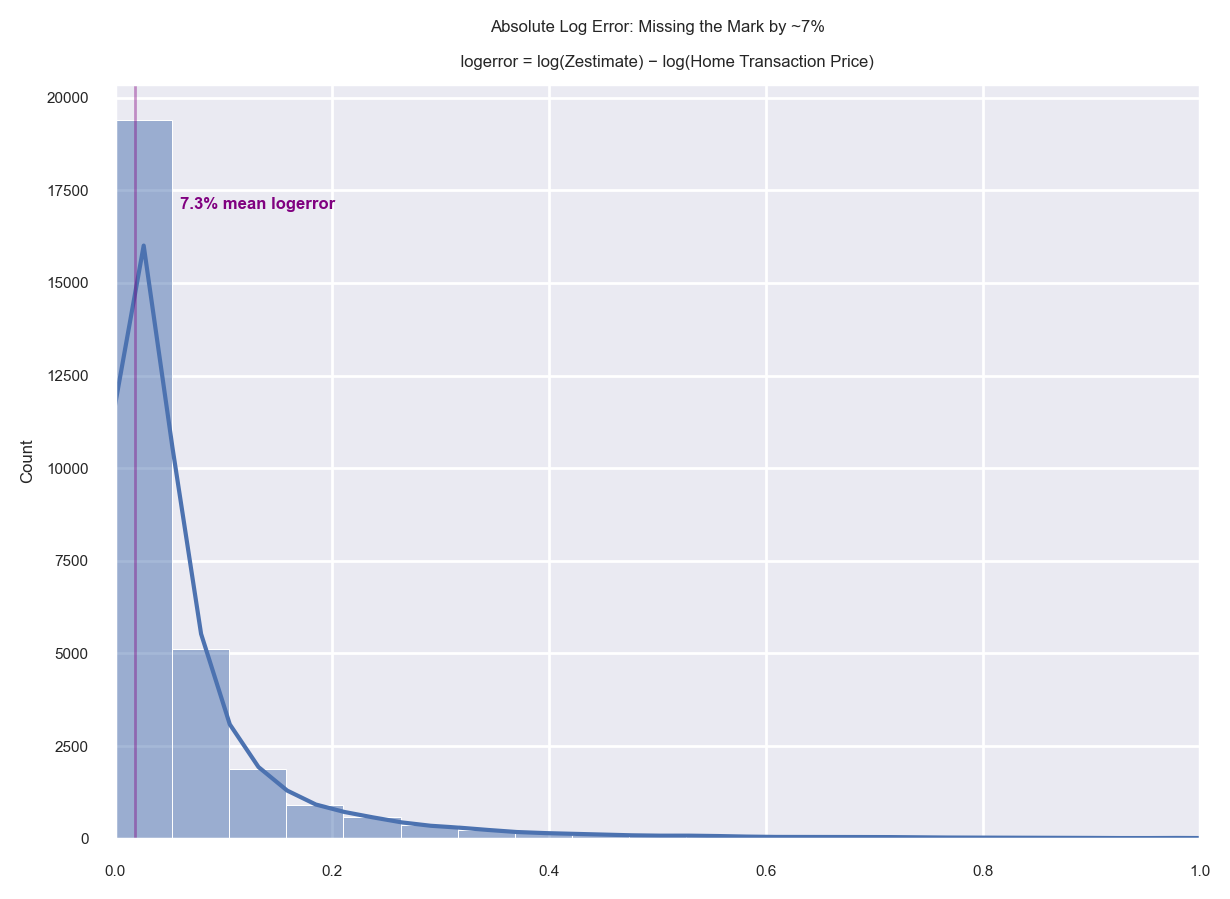

In [36]:
# let's look at absolute value for log error

plt.figure(figsize = (7, 5))
sns.set(font_scale = 0.5)

sns.histplot(
    abs(train_imputed["logerror"]), \
    bins = 100, \
    kde = True)

plt.axvline(train_imputed["logerror"].mean(), 
    linewidth = 1, 
    color = 'purple', 
    alpha = 0.4, 
    label = "mean")
    
plt.text(0.06, 17000, "7.3% mean logerror", 
    horizontalalignment = 'left', 
    size = 'medium', 
    color = 'purple', 
    weight = 'semibold')

plt.title('''Absolute Log Error: Missing the Mark by ~7%\n
    logerror = log(Zestimate) − log(Home Transaction Price)''')
plt.xlabel(None)
plt.xlim(0, 1)
plt.show()

------
### ``Question #1: Is there a difference in log error across the three (3) counties?``

<u>**``Conducting ANOVA analysis across examined features``**</u>

**Null Hypothesis:** "There's **not** a statistical log error variance difference across features."

**Alternative Hypothesis:** "There **is** a statistical log error variance difference across features."

$\alpha$: 0.05

In [37]:
# setting the alpha value

confidence_interval = 0.95
alpha = 1 - confidence_interval

County: LA County
logerror: 0.02927424426414358
-------------------------
County: Orange County
logerror: 0.04034169950019769
-------------------------
County: Ventura County
logerror: 0.028629318962612227
-------------------------


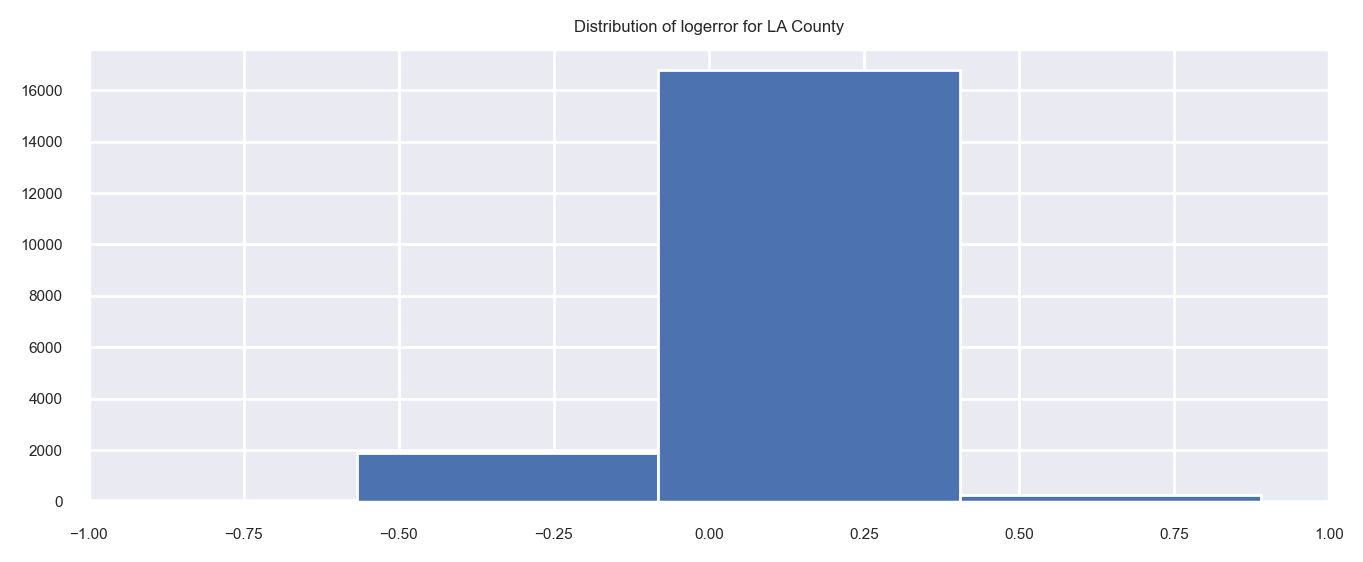

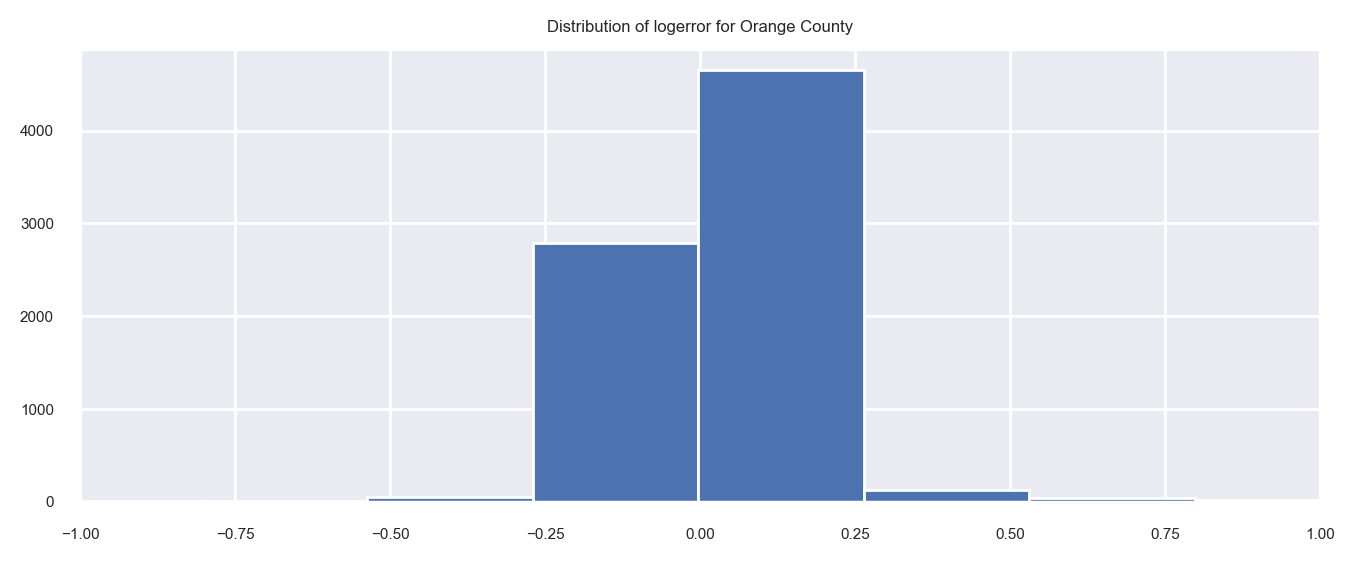

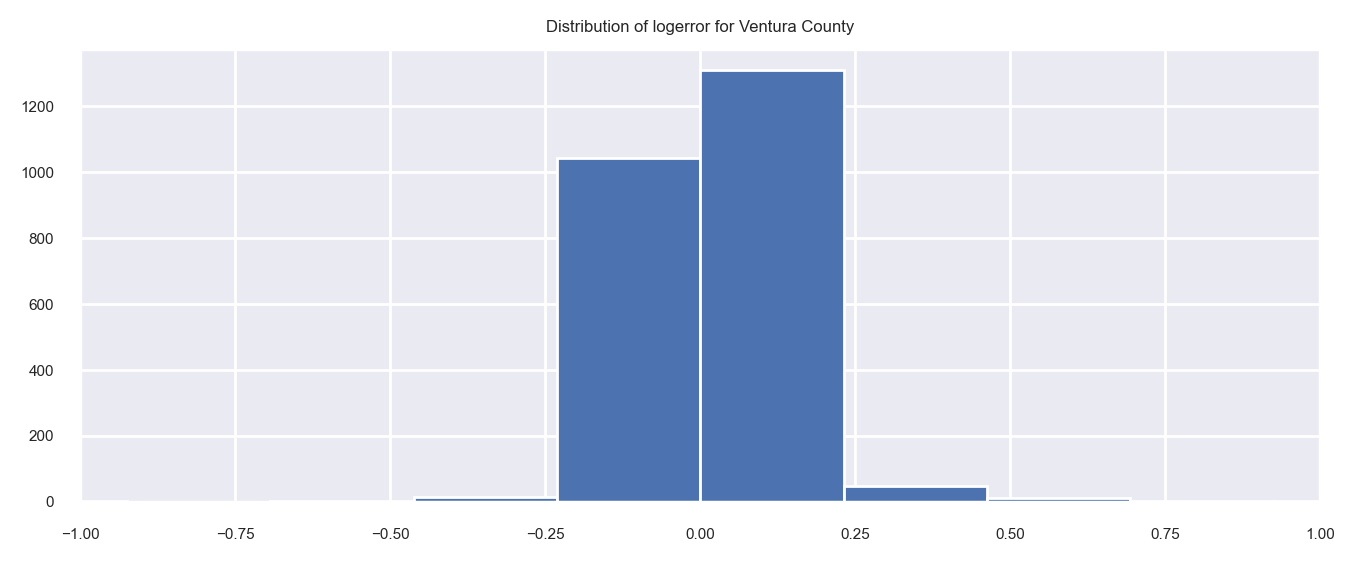

In [38]:
# Question Number #1:
# is there a difference in log error across the three (3) counties?

county_lst = list(train_imputed["county_by_fips"].unique())

for ele in county_lst:
    print(f'County: {ele}')
    print(f'logerror: {train_imputed[train_imputed["county_by_fips"] == ele].logerror.var()}')
    print('-------------------------')

    plt.figure(figsize = (8,3))
    plt.xlim(-1, 1)

    plt.title('Distribution of logerror for {}'.format(ele))
    plt.hist(train_imputed[train_imputed["county_by_fips"] == ele].logerror, bins = 20)

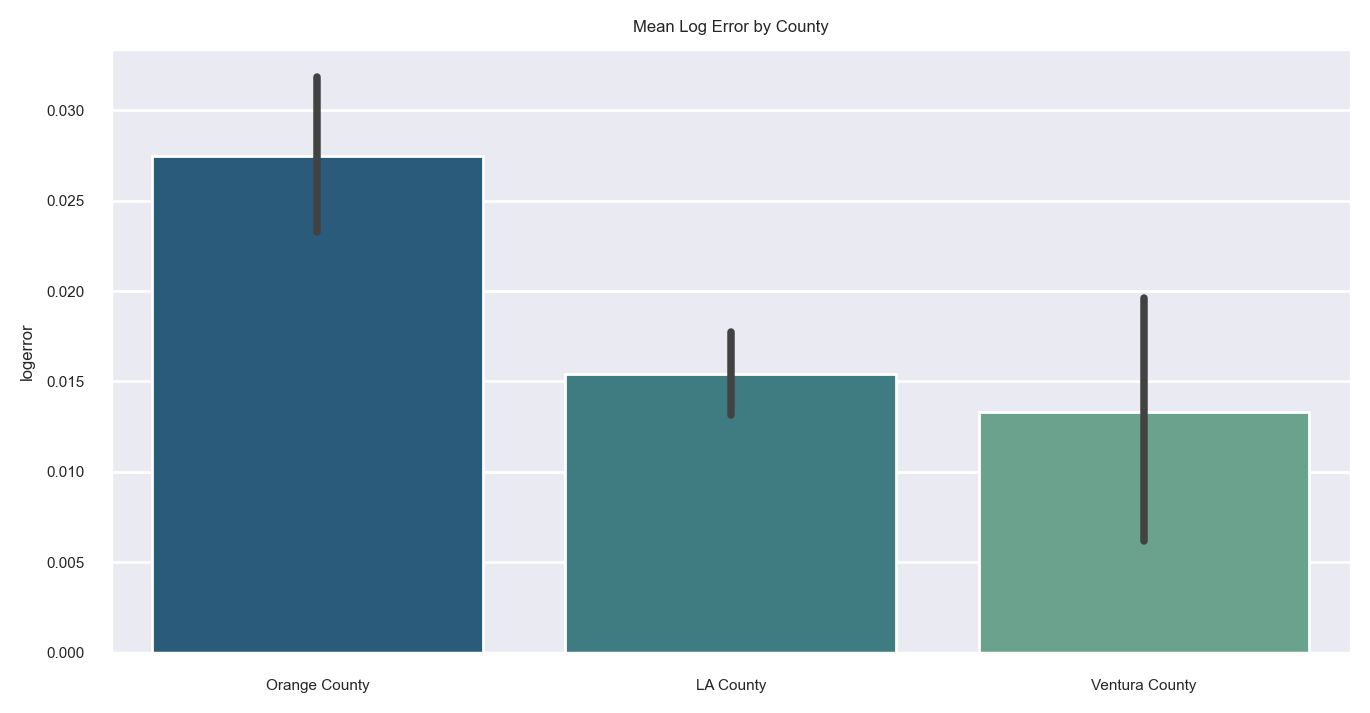

In [39]:
# average log error across counties

plt.figure(figsize = (8, 4))
sns.barplot(
    x = "county_by_fips", 
    y = "logerror", 
    data = train_imputed,
    order = ["Orange County", "LA County", "Ventura County"],
    palette = "crest_r")

plt.title("Mean Log Error by County")
plt.xlabel(None)
plt.show()

In [40]:
# running a lavene's test to assess variance

#H0: Variances are equal
#Ha: Variances are not equal

l_stat, p_value = stats.levene(
    train_imputed[train_imputed["county_by_fips"] == "LA County"].logerror,
    train_imputed[train_imputed["county_by_fips"] == "Orange County"].logerror,
    train_imputed[train_imputed["county_by_fips"] == "Ventura County"].logerror)

# comparing the counties p_value to alpha
print(f'f statistic = {l_stat.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Variances are not equal.')
else:
    print('We fail to reject the null hypothesis. Variances are relatively equal.')

f statistic = 15.58353
p value = 0.0
-----------------
We reject the null hypothesis. Variances are not equal.


In [41]:
# ANOVA hypothesis test

f_statistic, p_value = stats.f_oneway(
    train_imputed[train_imputed["county_by_fips"] == "LA County"].logerror,
    train_imputed[train_imputed["county_by_fips"] == "Orange County"].logerror,
    train_imputed[train_imputed["county_by_fips"] == "Ventura County"].logerror)


# comparing the counties p_value to alpha
print(f'f statistic = {f_statistic.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

f statistic = 13.51996
p value = 0.0
-----------------
We reject the null hypothesis.


------
### ``Question #2: Is there a difference in log error across home eras?``

**Null Hypothesis:** "There's **not** a statistical log error variance difference across features."

**Alternative Hypothesis:** "There **is** a statistical log error variance difference across features."

$\alpha$: 0.05

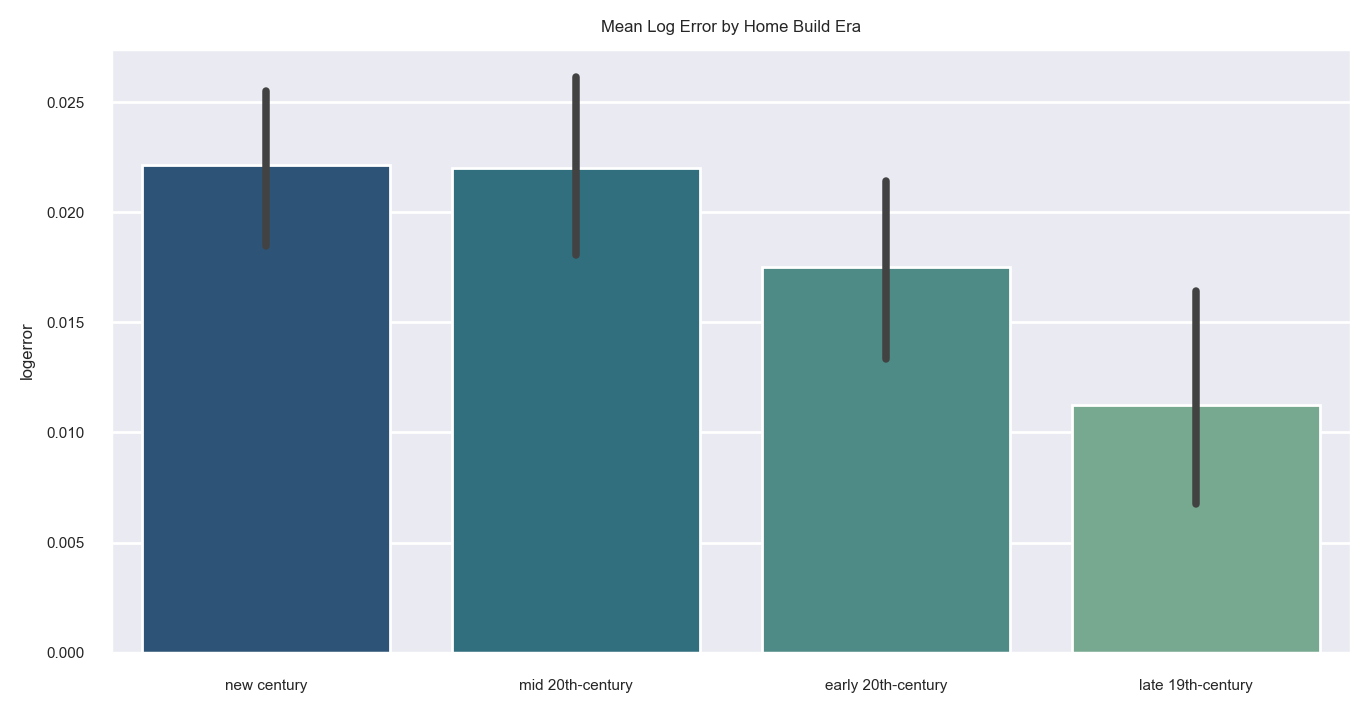

In [42]:
# average log error across home era

plt.figure(figsize = (8, 4))
sns.set(font_scale = 0.5)

sns.barplot(
    x = "home_age-binned", 
    y = "logerror", 
    data = train_imputed,
    # order = ["Orange County", "LA County", "Ventura County"],
    palette = "crest_r")

plt.title("Mean Log Error by Home Build Era")
plt.xlabel(None)
plt.show()

In [43]:
# conducting a lavene's test to assess variance

#H0: Variances are equal
#Ha: Variances are not equal

l_stat, p_value = stats.levene(
    train_imputed[train_imputed["home_age-binned"] == "new century"].logerror,
    train_imputed[train_imputed["home_age-binned"] == "mid 20th-century"].logerror,
    train_imputed[train_imputed["home_age-binned"] == "early 20th-century"].logerror,
    train_imputed[train_imputed["home_age-binned"] == "late 19th-century"].logerror)

# comparing the counties p_value to alpha
print(f'f statistic = {l_stat.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Variances are not equal.')
else:
    print('We fail to reject the null hypothesis. Variances are equal.')

f statistic = 97.57514
p value = 0.0
-----------------
We reject the null hypothesis. Variances are not equal.


In [44]:
# ANOVA hypothesis test for: home era

f_statistic, p_value = stats.f_oneway(
    train_imputed[train_imputed["home_age-binned"] == "new century"].logerror,
    train_imputed[train_imputed["home_age-binned"] == "mid 20th-century"].logerror,
    train_imputed[train_imputed["home_age-binned"] == "early 20th-century"].logerror,
    train_imputed[train_imputed["home_age-binned"] == "late 19th-century"].logerror)

# comparing the counties p_value to alpha
print(f'f statistic = {f_statistic.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Means are different across the groups.')
else:
    print('We fail to reject the null hypothesis. Means are similar across the groups.')

f statistic = 5.74434
p value = 0.00063
-----------------
We reject the null hypothesis. Means are different across the groups.


----
### ``Question #3: Is there a difference in log error across home era in Orange County?``

**Null Hypothesis:** There's not a logerror variance difference across home eras in Orange County.

**Althernative Hypothesis:** There is a logerror variance difference across home eras in Orange County.

In [45]:
# setting the alpha value

alpha = 0.05

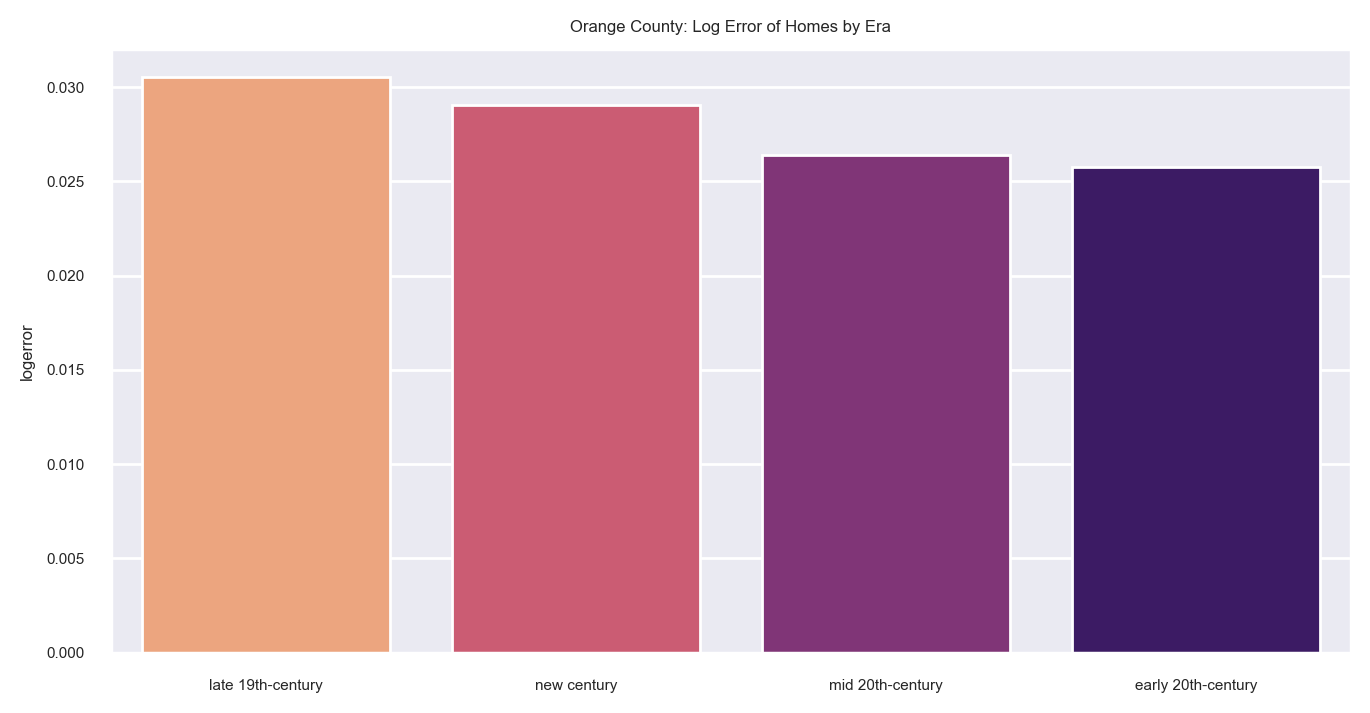

In [46]:
# is there a difference in logerror across orange county and the home build era?

county_lst = list(train_imputed["county_by_fips"].unique())
home_era = list(train_imputed["home_age-binned"].unique())

plt.figure(figsize = (8, 4))
sns.barplot(
    x = "home_age-binned",
    y = train_imputed[train_imputed["county_by_fips"] == "Orange County"].logerror,
    data = train_imputed,
    order = ["late 19th-century", "new century", "mid 20th-century", "early 20th-century"], 
    ci = None,
    palette = "magma_r")

plt.title("Orange County: Log Error of Homes by Era")
plt.xlabel(None)
plt.show()

In [47]:
# conducting a lavene's test to assess variance across build era and orange county

#H0: Variances are equal
#Ha: Variances are not equal

l_stat, p_value = stats.levene(
    train_imputed[(train_imputed["home_age-binned"] == "new century") & (train_imputed["county_by_fips"] == "Orange County")].logerror,
    train_imputed[(train_imputed["home_age-binned"] == "mid 20th-century") & (train_imputed["county_by_fips"] == "Orange County")].logerror,
    train_imputed[(train_imputed["home_age-binned"] == "early 20th-century") & (train_imputed["county_by_fips"] == "Orange County")].logerror,
    train_imputed[(train_imputed["home_age-binned"] == "late 19th-century") & (train_imputed["county_by_fips"] == "Orange County")].logerror)

# comparing the counties p_value to alpha
print(f'f statistic = {l_stat.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Variances are not equal.')
else:
    print('We fail to reject the null hypothesis. Variances are relatively equal.')

f statistic = 16.02712
p value = 0.0
-----------------
We reject the null hypothesis. Variances are not equal.


----
### ``Question #4: Is there a difference in log error across transaction quarter?``

**Null Hypothesis:** "There's **not** a statistical log error variance difference across features."

**Alternative Hypothesis:** "There **is** a statistical log error variance difference across features."

$\alpha$: 0.05

In [48]:
# setting the alpha value

alpha = 0.05

In [49]:
# checking the dataframe

train_imputed.head()

,bathroom_count-capped,bedroom_count-capped,living_sq_feet-capped,county_by_fips,land_assessed_value-capped,latitude-capped,logerror,longitude-capped,property_sq_feet-capped,county_zoning_code,...,taxamount-capped,home_value-capped,year_built,home_age-capped,transaction_month,home_age-binned,living_sqfeet-binned,q1_transaction,q2_transaction,q3_transaction
7961,3.00,3.00,1903.00,LA County,715657.00,34204513.00,0.15,-118131241.00,10704.00,0100,...,10691.12,912304.00,1957.00,60.00,February,early 20th-century,1654_to_2299_sqfeet,True,False,False
47936,3.00,4.00,2108.00,LA County,862962.00,34147955.00,0.01,-118350425.00,8432.00,0100,...,14441.20,1256382.50,1935.00,82.00,August,late 19th-century,1654_to_2299_sqfeet,False,False,True
20730,4.00,4.00,2446.00,LA County,432406.00,34135818.00,-0.04,-118407312.00,9568.00,0100,...,10333.34,850525.00,1962.00,55.00,April,mid 20th-century,2299_to_3863_sqfeet,False,True,False
1988,1.00,3.00,1120.00,LA County,408600.00,33893976.00,-0.05,-118334891.00,5250.00,0101,...,6387.31,510000.00,1953.00,64.00,January,early 20th-century,128_to_1267_sqfeet,True,False,False
45959,2.00,3.00,1918.00,LA County,193425.00,33910440.00,0.03,-118013069.00,7936.00,0100,...,4519.94,343172.00,1958.00,59.00,August,early 20th-century,1654_to_2299_sqfeet,False,False,True


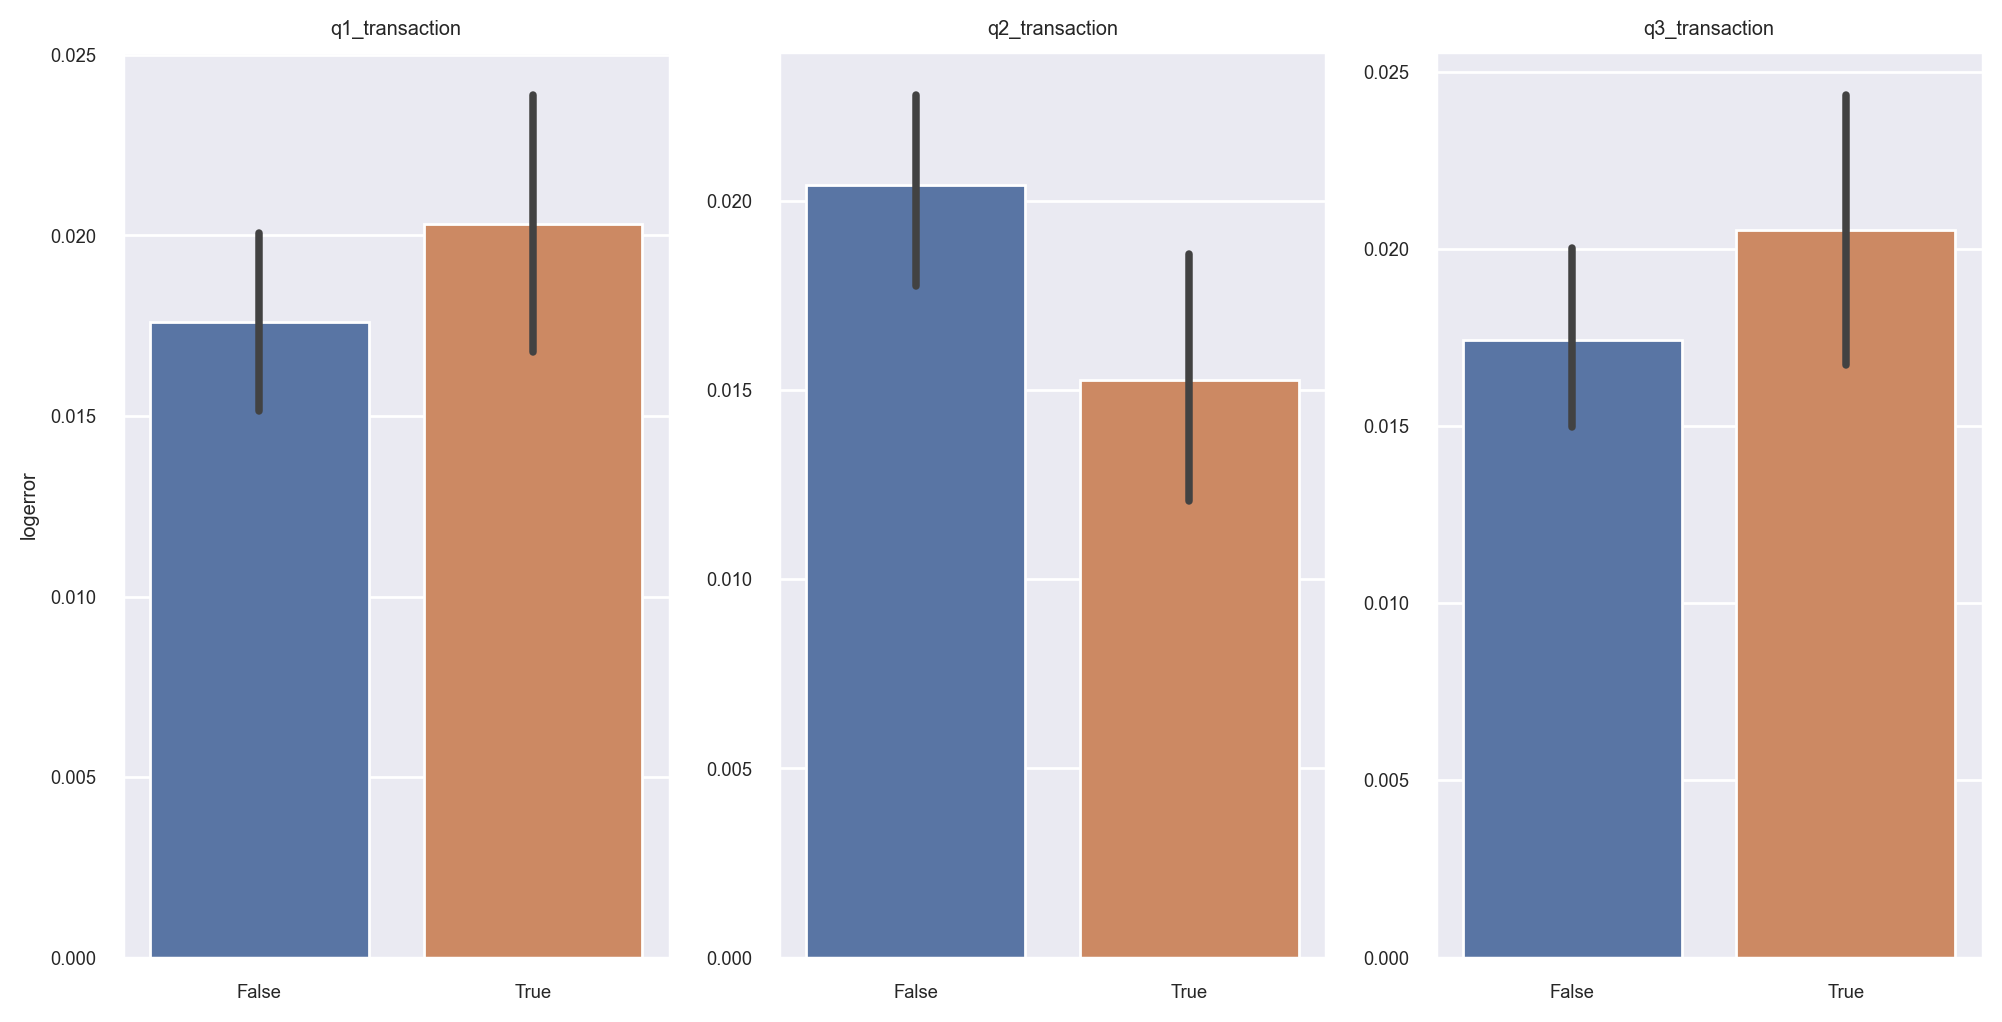

In [50]:
# plotting home transactions by quarters

plt.figure(figsize = (12, 6))
sns.set(font_scale = 0.6)
plt.xlabel(None)

quarter_cols = ["q1_transaction", "q2_transaction", "q3_transaction"]

plt.subplot(131)
sns.barplot(
    x = quarter_cols[0],
    y = "logerror",
    data = train_imputed)
plt.title(quarter_cols[0])
plt.xlabel(None)

plt.subplot(132)
sns.barplot(
    x = quarter_cols[1],
    y = "logerror",
    data = train_imputed)
plt.title(quarter_cols[1])
plt.ylabel(None)
plt.xlabel(None)

plt.subplot(133)
sns.barplot(
    x = quarter_cols[2],
    y = "logerror",
    data = train_imputed)
plt.title(quarter_cols[2])
plt.ylabel(None)
plt.xlabel(None)

plt.show()

In [52]:
# conducting a lavene's test to assess variance

#H0: Variances are equal
#Ha: Variances are not equal

l_stat, p_value = stats.levene(
    train_imputed[train_imputed["q1_transaction"] == True].logerror,
    train_imputed[train_imputed["q2_transaction"] == True].logerror,
    train_imputed[train_imputed["q3_transaction"] == True].logerror)

# comparing the counties p_value to alpha
print(f'f statistic = {l_stat.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Variances are not equal.')
else:
    print('We fail to reject the null hypothesis. Variances are relatively equal.')

f statistic = 0.98162
p value = 0.37472
-----------------
We fail to reject the null hypothesis. Variances are equal.


In [53]:
# ANOVA hypothesis test for: transactions by quarter

f_statistic, p_value = stats.f_oneway(
    train_imputed[train_imputed["q1_transaction"] == True].logerror,
    train_imputed[train_imputed["q2_transaction"] == True].logerror,
    train_imputed[train_imputed["q3_transaction"] == True].logerror)

# comparing the counties p_value to alpha
print(f'f statistic = {f_statistic.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Means are different across the groups.')
else:
    print('We fail to reject the null hypothesis. Means are similar across the groups.')

f statistic = 2.89256
p value = 0.05545
-----------------
We fail to reject the null hypothesis. Means are similar across the groups.


----
### ``Question #5: Is there a difference in log error across transaction month?``

**Null Hypothesis:** "There's **not** a statistical log error variance difference across features."

**Alternative Hypothesis:** "There **is** a statistical log error variance difference across features."

$\alpha$: 0.05 

In [54]:
# let's get a list of all the months

lst_of_months = list(train["transaction_month"].unique())
lst_of_months # checks out!

['February',
 'August',
 'April',
 'January',
 'March',
 'September',
 'July',
 'May',
 'June']

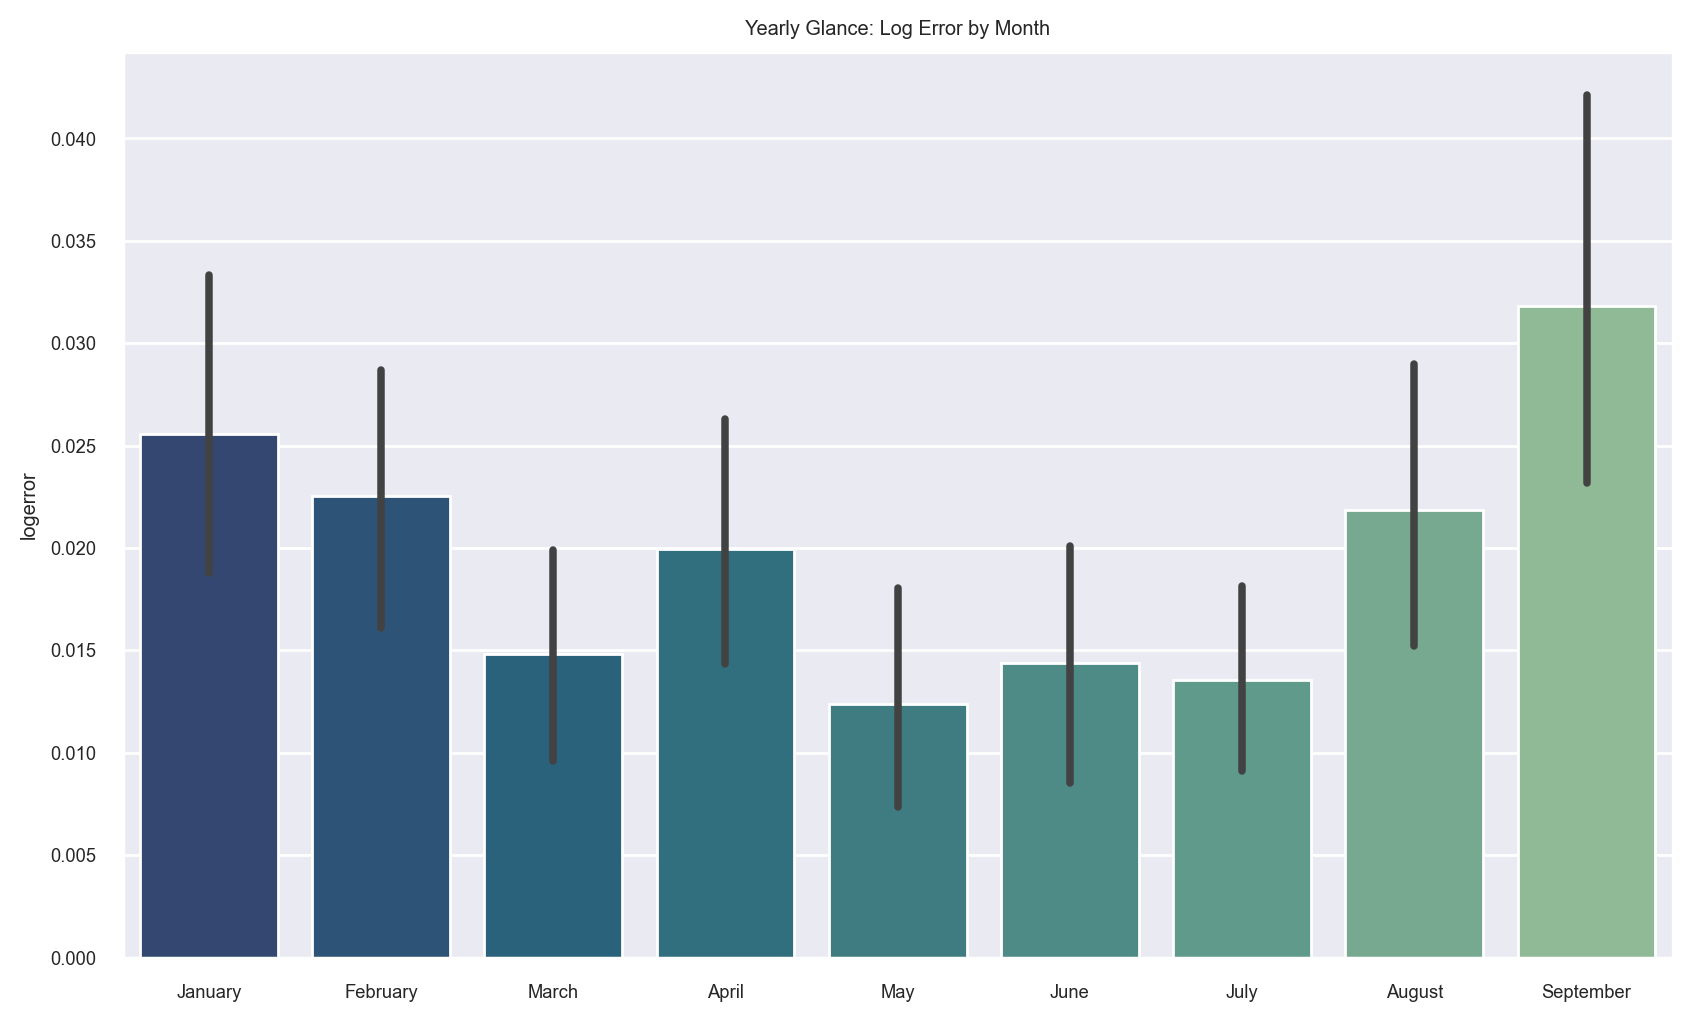

In [64]:
# creating a for loop to bar plot log error for all months


plt.figure(figsize = (10, 6))
sns.barplot(x = "transaction_month",
    y = "logerror", 
    data = train_imputed,
    order = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September'],
    palette = "crest_r",
    ci = 95)

plt.title("Yearly Glance: Log Error by Month")
plt.xlabel(None)
plt.show()

In [65]:
# conducting a lavene's test to assess variance

#H0: Variances are equal
#Ha: Variances are not equal

l_stat, p_value = stats.levene(
    train_imputed[train_imputed["transaction_month"] == "January"].logerror,
    train_imputed[train_imputed["transaction_month"] == "February"].logerror,
    train_imputed[train_imputed["transaction_month"] == "March"].logerror,
    train_imputed[train_imputed["transaction_month"] == "April"].logerror,
    train_imputed[train_imputed["transaction_month"] == "May"].logerror,
    train_imputed[train_imputed["transaction_month"] == "June"].logerror,
    train_imputed[train_imputed["transaction_month"] == "July"].logerror,
    train_imputed[train_imputed["transaction_month"] == "August"].logerror,
    train_imputed[train_imputed["transaction_month"] == "September"].logerror)

# comparing the counties p_value to alpha
print(f'f statistic = {l_stat.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Variances are not equal.')
else:
    print('We fail to reject the null hypothesis. Variances are relatively equal.')

f statistic = 2.73992
p value = 0.00508
-----------------
We reject the null hypothesis. Variances are not equal.


In [66]:
# ANOVA hypothesis test for: transactions by quarter

f_statistic, p_value = stats.f_oneway(
    train_imputed[train_imputed["transaction_month"] == "January"].logerror,
    train_imputed[train_imputed["transaction_month"] == "February"].logerror,
    train_imputed[train_imputed["transaction_month"] == "March"].logerror,
    train_imputed[train_imputed["transaction_month"] == "April"].logerror,
    train_imputed[train_imputed["transaction_month"] == "May"].logerror,
    train_imputed[train_imputed["transaction_month"] == "June"].logerror,
    train_imputed[train_imputed["transaction_month"] == "July"].logerror,
    train_imputed[train_imputed["transaction_month"] == "August"].logerror,
    train_imputed[train_imputed["transaction_month"] == "September"].logerror)

# comparing the counties p_value to alpha
print(f'f statistic = {f_statistic.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Means are different across the groups.')
else:
    print('We fail to reject the null hypothesis. Means are similar across the groups.')

f statistic = 3.48429
p value = 0.0005
-----------------
We reject the null hypothesis. Means are different across the groups.


----
### ``Question #6: Is there a difference across home transaction months in Orange County?``

**Null Hypothesis:** There's not a logerror variance difference across transaction months in Orange County.

**Althernative Hypothesis:** There is a logerror variance difference across transaction months in Orange County.

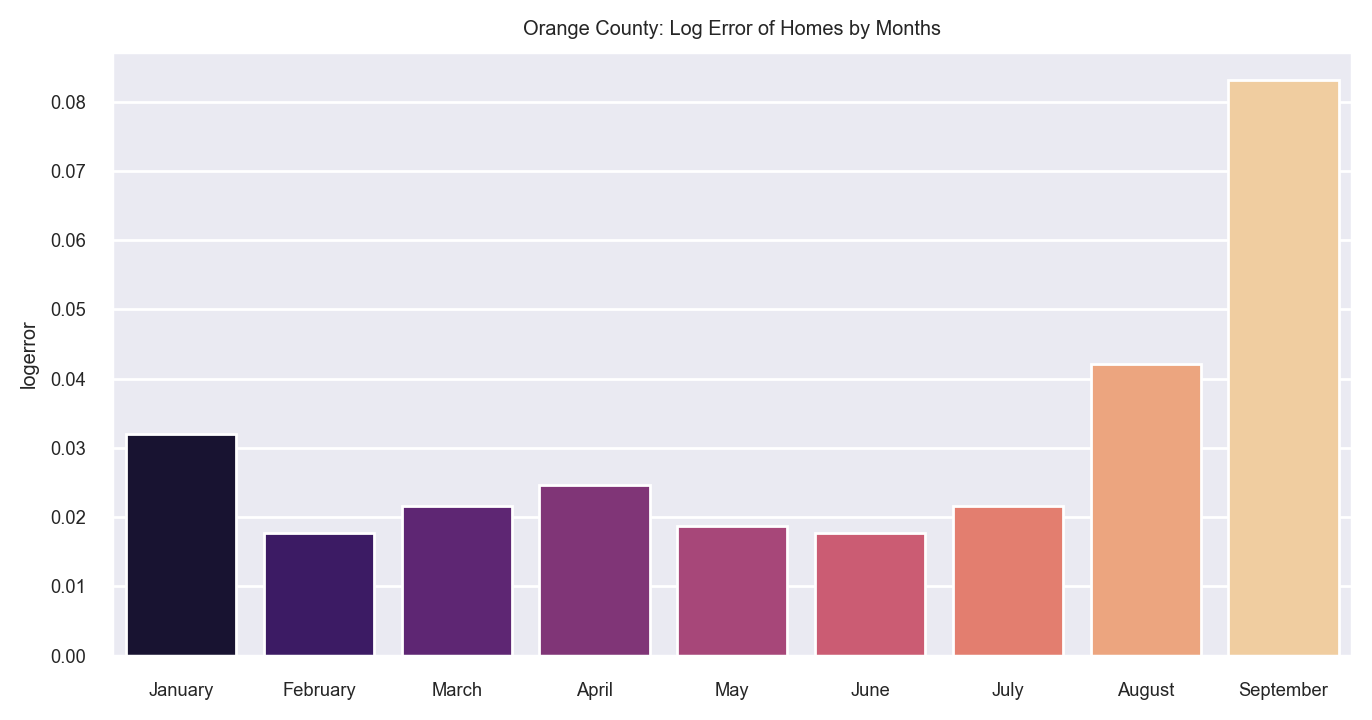

In [68]:
county_lst = list(train_imputed["county_by_fips"].unique())
home_era = list(train_imputed["home_age-binned"].unique())

plt.figure(figsize = (8, 4))
sns.barplot(
    x = "transaction_month",
    y = train_imputed[train_imputed["county_by_fips"] == "Orange County"].logerror,
    data = train_imputed, 
    ci = None,
    order = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September'],
    palette = "magma")

plt.title("Orange County: Log Error of Homes by Months")
plt.xlabel(None)
plt.show()

In [69]:
# conducting a lavene's test to assess variance

#H0: Variances are equal
#Ha: Variances are not equal

l_stat, p_value = stats.levene(
    train_imputed[(train_imputed["transaction_month"] == "January") & (train_imputed["county_by_fips"] == "Orange County")].logerror,
    train_imputed[(train_imputed["transaction_month"] == "February") & (train_imputed["county_by_fips"] == "Orange County")].logerror,
    train_imputed[(train_imputed["transaction_month"] == "March")& (train_imputed["county_by_fips"] == "Orange County")].logerror,
    train_imputed[(train_imputed["transaction_month"] == "April") & (train_imputed["county_by_fips"] == "Orange County")].logerror,
    train_imputed[(train_imputed["transaction_month"] == "May") & (train_imputed["county_by_fips"] == "Orange County")].logerror,
    train_imputed[(train_imputed["transaction_month"] == "June") & (train_imputed["county_by_fips"] == "Orange County")].logerror,
    train_imputed[(train_imputed["transaction_month"] == "July") & (train_imputed["county_by_fips"] == "Orange County")].logerror,
    train_imputed[(train_imputed["transaction_month"] == "August") & (train_imputed["county_by_fips"] == "Orange County")].logerror,
    train_imputed[(train_imputed["transaction_month"] == "September") & (train_imputed["county_by_fips"] == "Orange County")].logerror)

# comparing the counties p_value to alpha
print(f'f statistic = {l_stat.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Variances are not equal.')
else:
    print('We fail to reject the null hypothesis. Variances are relatively equal.')

f statistic = 4.43916
p value = 2e-05
-----------------
We reject the null hypothesis. Variances are not equal.
